<a href="https://colab.research.google.com/github/wahab14131211/ELE888-Labs/blob/master/Lab1/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module and Function Declarations

Import Modules

In [1]:
import statistics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

Define Standardize Function

>Standardize the parameter list

In [2]:
def Standardize(list):
    average = statistics.mean(list)
    standard_deviation = statistics.stdev(list)
    return [(element-average)/standard_deviation for element in list]

Define Error/Cost Function
>Input model parameters m and b, along with the training data and calculate error

In [3]:
def Error(m,b,data):
    error=0
    for i in range(data["Num of Samples"]):
        error += (data["Final Marks"]["Values"][i] - (m * data["Midterm Marks"]["Values"][i] + b)) ** 2
    return error/data["Num of Samples"]

Define Gradient Partial Descent Function
>Input model parameters m and b, training data, and the parameter to run the function on (must be 'm' or 'b')

In [4]:
def GPD(m,b,data,parameter):
    if (parameter != 'm' and parameter != 'b'):
        return None
    diff=0
    for i in range(data["Num of Samples"]):
        sum_term = -1*(data["Final Marks"]["Values"][i] - (m*data["Midterm Marks"]["Values"][i] + b))
        if parameter == 'm':
            sum_term *= data["Midterm Marks"]["Values"][i]
        diff += sum_term
    return 2*diff/data["Num of Samples"]

Define Update Function
>Input model parameters m and b, training data, and the parameter to update (must be 'm' or 'b'), and the learning rate alpha

In [5]:
def Update(m,b,data,parameter,alpha):
    if (parameter == 'm'):
        return m-alpha*GPD(m,b,data,'m')
    if (parameter == 'b'):
        return b-alpha*GPD(m,b,data,'b')
    return None

Define Show Model function
>Input model parameters m and b, training data, and a figure title to plot the model and training data on the same figure

In [6]:
def showmodel(m,b,data,title):
    plt.scatter(data["Midterm Marks"]["Values"], data["Final Marks"]["Values"], color='#00008B',label='Normalized Data Set')
    plt.plot(data["Midterm Marks"]["Values"], [m * value + b for value in data["Midterm Marks"]["Values"]],color='#FF0000', label='Linear Regression Model')
    plt.xlabel("Normalized Midterm Marks")
    plt.ylabel("Normalized Final Marks")
    plt.legend(loc="lower right")
    plt.title(title)
    plt.show()

Define Show Error function
>input a list which contains the error for each iteration, along with a figure title to plot the error

In [7]:
def showerror(error,title):
    plt.plot(range(1,len(error)+1), error,color='#FF0000')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Error")
    plt.title(title)
    plt.show()

Define trainModel Function
>input initial model parameters m and b, training rate alpha, training data, number of desired iterations, and a boolean if the training data is standardized (only used to change plot titles)

>Used to easily train models for different iterations

In [22]:
def trainModel(m,b,alpha,data,num_of_iterations,standardized):
    error=[]
    for i in range(num_of_iterations):
        m_old = m
        b_old = b
        m = Update(m_old, b_old, data, 'm', alpha)
        b = Update(m_old, b_old, data, 'b', alpha)
        error.append(Error(m,b,data))
    if standardized:
        showmodel(m, b, data, "Model After {} iterations(m={:.3f}, b={:.3e})".format(num_of_iterations,m,b))
        showerror(error,"Error Through {} iterations".format(num_of_iterations))
    else:
        showmodel(m, b, data, "Model After {} iterations(m={:.3f}, b={:.3e}) Not Standardized".format(num_of_iterations,m,b))
        showerror(error,"Error Through {} iterations - Not Standardized".format(num_of_iterations))
    #print("Model After {} iterations--> m={:.3f}, b={:.3e}".format(num_of_iterations,m,b))

# Begin Main Code Execution

## Injest CSV and pre-process data 

* injest training data using pandas
* convert data into dictionary to easily reference data (and normalize the data)

In [9]:
raw_data = pd.read_csv(r'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv')
data={
    "Midterm Marks": {
        "Values" : Standardize(raw_data['Midterm mark']),
        "Standard Deviation" : statistics.stdev(raw_data['Midterm mark']),
        "Average" : statistics.mean(raw_data['Midterm mark'])},
    "Final Marks": {
        "Values": Standardize(raw_data['Final mark']),
        "Standard Deviation": statistics.stdev(raw_data['Final mark']),
        "Average": statistics.mean(raw_data['Final mark'])},
    "Num of Samples": raw_data.__len__()
}

##Initialize Module Parameters and Plot Data

Initialize model parameters m,b and training rate alpha

Plot training data and initial model

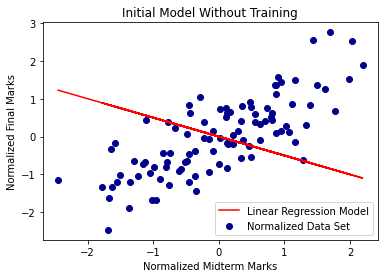

In [10]:
m,b,alpha = -0.5,0,0.0001
showmodel(m,b,data,"Initial Model Without Training")

## Train Models with Standardized data and Learning Rate of 0.0001

Train model for 100 iterations

Plot model and plot error

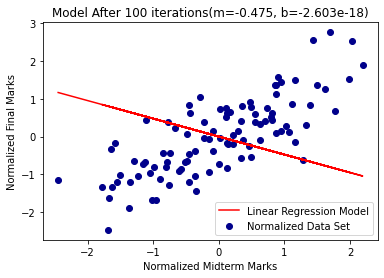

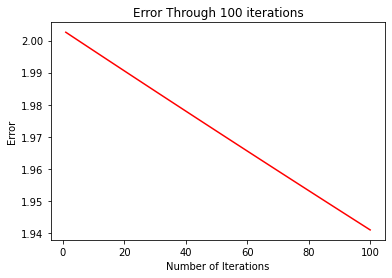

In [11]:
trainModel(m,b,alpha,data,100,True)

Since the error is decreasing linearly, lets increase the number of iterations to 2000 and observe the result

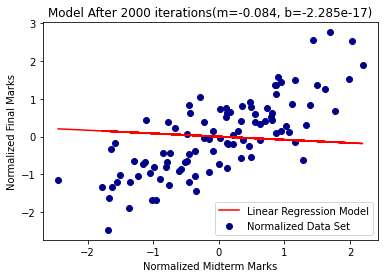

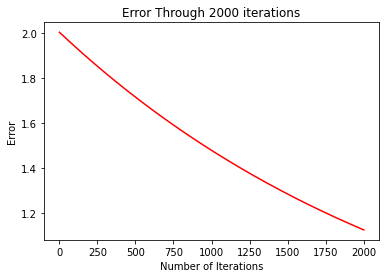

In [12]:
trainModel(m,b,alpha,data,2000,True)

After 2000 iterations, the error is still decreasing linearly, so lets increase the number of iterations to 100 000

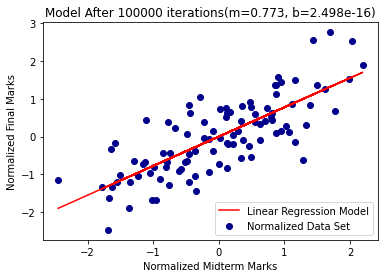

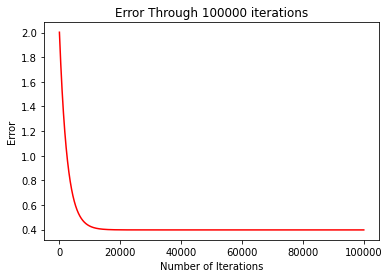

In [13]:
trainModel(m,b,alpha,data,100000,True)

By observing the previous error plot, we can see that the error is not decreasing much more for more iterations, so we can say this model is sufficiently trained.

Now, lets prove that increasing the number of iterations will not result in a far more accurate model by training it with 10 million iterations

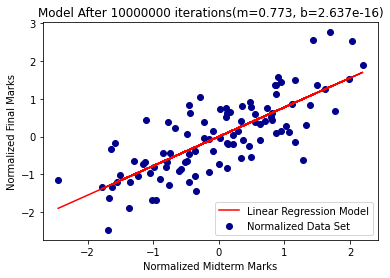

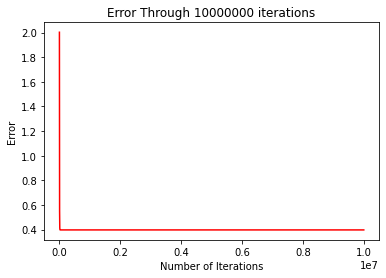

In [14]:
#trainModel(m,b,alpha,data,10000000,True)

## Train Model using Sklearn

Now, lets verify this model by comparing it to a model generated by scikit-learn
>Note: the fit method requires a 2d numpy array as its x input (where the first dimention is each feature, and the second dimeniton is each sample) and a 1d numpy array as its y input

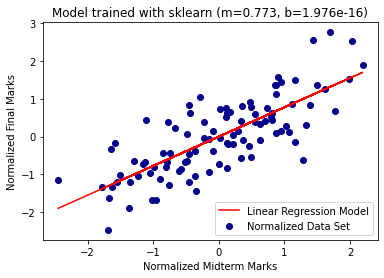

In [15]:
regr = linear_model.LinearRegression()
regr.fit(np.array(data["Midterm Marks"]["Values"]).reshape(-1,1), np.array(data["Final Marks"]["Values"]))
showmodel(regr.coef_[0],regr.intercept_,data,"Model trained with sklearn (m={:.3f}, b={:.3e})".format(regr.coef_[0],regr.intercept_))

As we can see, using Sklearn, the parameters are: m=0.773 and b=1.98e-16 while our generated parameters are: m=0.773 and b=2.498e-16. Therefore the simple algorithm for our implementation of linear regression is correct.

## Train Model using Learning Rate of 0.1

In our previous training calls, we fixed the learning rate alpha to 0.0001.
Now, lets investigate when happens when we increase this value to 0.1

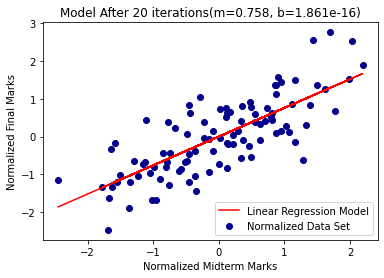

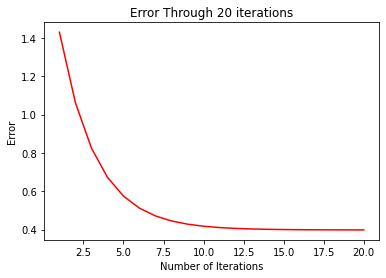

In [16]:
alpha=0.1
trainModel(m,b,alpha,data,20,True)

As you can see, after only \~10 iterations the error does not decrease much more, and the model is very close to the sklearn generated model (m=0.758 vs m=0.773 and b~0 in both models)

## Train Models with Non-Standardized Data

Previously, all models were trained with standardized data, however, lets explore what happens when we use the original values to train our model:

Populate data dictionary with non-standardized values

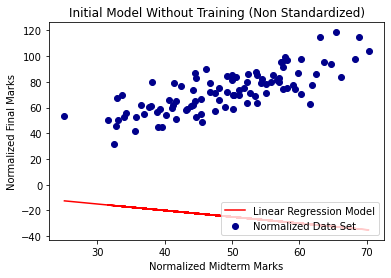

In [17]:
data["Midterm Marks"]["Values"] = raw_data['Midterm mark']
data["Final Marks"]["Values"] = raw_data['Final mark']
alpha = 0.0001 #reset alpha
showmodel(m,b,data,"Initial Model Without Training (Non Standardized)")

Now, lets train the model for 100 and 2000 iterations

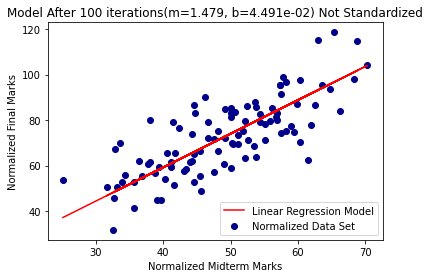

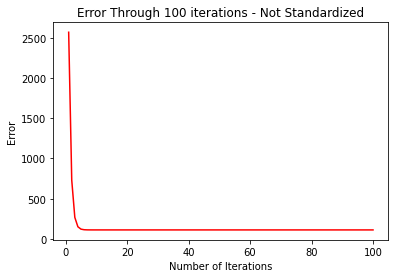

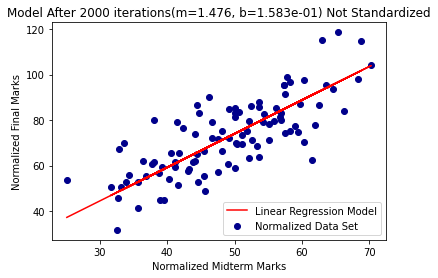

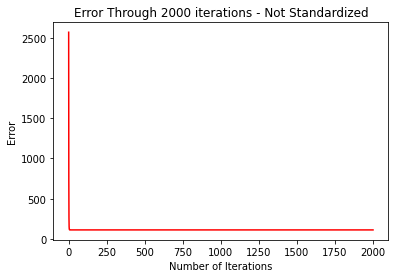

In [18]:
trainModel(m,b,alpha,data,100,False)
trainModel(m,b,alpha,data,2000,False)

relatively Since the difference between the model and data (aka, error) is relatively  large, the gradient partial descent algorithm produces a much larger change for each iteration (this has the same effect as a larger learning rate). Which is why the training appears to be much faster. 


## Train Models with Non-Standardized Data and Learning Rate of 0.1

m is -0.5, b is 0


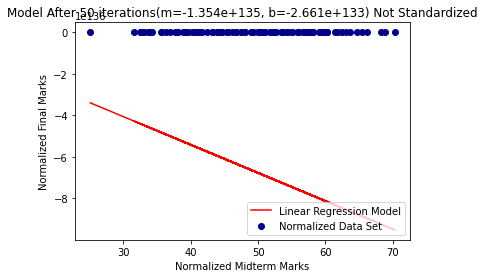

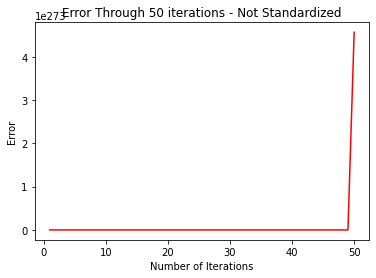

In [21]:
alpha = 0.1
print("m is {}, b is {}".format(m,b))
trainModel(m,b,alpha,data,50,False)

Due to the large training rate and the non-standardized values, the model diverges very quickly